In [1]:
import cv2 as cv
import numpy as np
import os
import re
import src.lib.preprocessing_functions as pf
from src import data, visualization
from src.preprocessing import CropImage #, ResizeImage

import matplotlib.patches as patches
from torch.utils.data import DataLoader

import src.lib.utils as utils
import time
import IPython
from sys import getsizeof

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [4]:
#data.save_imgs_2npy()


In [2]:
#images, _ = data.load_images_from_folder('data/images/dia_20')



In [15]:
images, time_stamps = [], []

images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_1', images, time_stamps, 10, "")
print(time_stamps)
print(last_img_filename)

[datetime.datetime(2020, 1, 1, 0, 0, 21), datetime.datetime(2020, 1, 1, 0, 10, 21), datetime.datetime(2020, 1, 1, 0, 20, 21), datetime.datetime(2020, 1, 1, 0, 30, 21), datetime.datetime(2020, 1, 1, 0, 40, 21), datetime.datetime(2020, 1, 1, 0, 50, 21), datetime.datetime(2020, 1, 1, 1, 0, 21), datetime.datetime(2020, 1, 1, 1, 10, 21), datetime.datetime(2020, 1, 1, 1, 20, 21), datetime.datetime(2020, 1, 1, 1, 30, 21)]
ART_2020001_013021.npy


In [19]:
images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_1', images, time_stamps, 10, last_img_filename)
print(time_stamps)
print(last_img_filename)



[datetime.datetime(2020, 1, 1, 0, 30, 21), datetime.datetime(2020, 1, 1, 0, 40, 21), datetime.datetime(2020, 1, 1, 0, 50, 21), datetime.datetime(2020, 1, 1, 1, 0, 21), datetime.datetime(2020, 1, 1, 1, 10, 21), datetime.datetime(2020, 1, 1, 1, 20, 21), datetime.datetime(2020, 1, 1, 1, 30, 21), datetime.datetime(2020, 1, 1, 1, 40, 21), datetime.datetime(2020, 1, 1, 1, 50, 21), datetime.datetime(2020, 1, 1, 2, 0, 21)]
ART_2020001_020021.npy


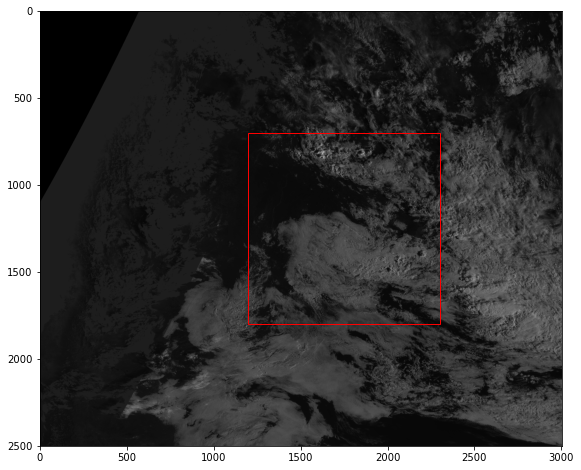

In [2]:
# Testing of class SatelliteImagesDataset

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_1')

n = 60

sample = dataset[n]
image, time_stamp = sample['image'], sample['time_stamp']

fig, ax = plt.subplots()

rect = patches.Rectangle((1200, 700), 1100, 1100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.imshow(image, cmap='gray')
plt.show()


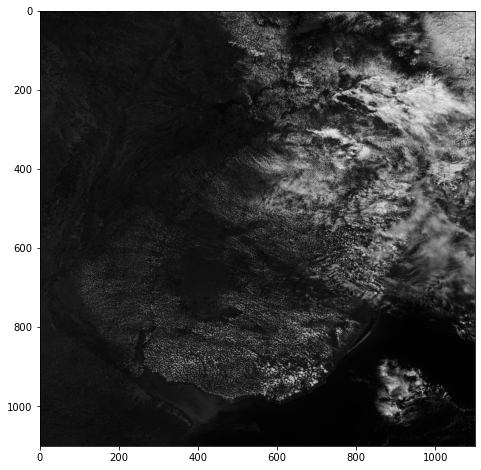

In [2]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305',
                                 transform = CropImage(vertices))

n = 90
# sample = dataset[n]
#image, time_stamp = sample['image'], sample['time_stamp']
image, time_stamp = dataset[n]
fig, ax = plt.subplots()


plt.imshow(image, cmap='gray')
plt.show()

In [5]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_305',
                                 transform = CropImage(vertices))
n = 91
sample = dataset[n]
image, time_stamp = sample['image'], sample['time_stamp']

# print(time_stamp)
# datetime_str = utils.datetime2str(time_stamp)
# print(datetime_str)
# datetime_obj = utils.str2datetime(datetime_str)
# print(datetime_obj)


dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=False, num_workers=0)

for i_batch, sample in enumerate(dataloader):
    if i_batch==0:
       print(i_batch, sample['image'].shape, [util.str2datetime(dt_str) for dt_str in sample['time_stamp']])

0 torch.Size([4, 1100, 1100]) [datetime.datetime(2020, 10, 31, 0, 0, 18), datetime.datetime(2020, 10, 31, 0, 10, 18), datetime.datetime(2020, 10, 31, 0, 20, 18), datetime.datetime(2020, 10, 31, 0, 30, 18)]


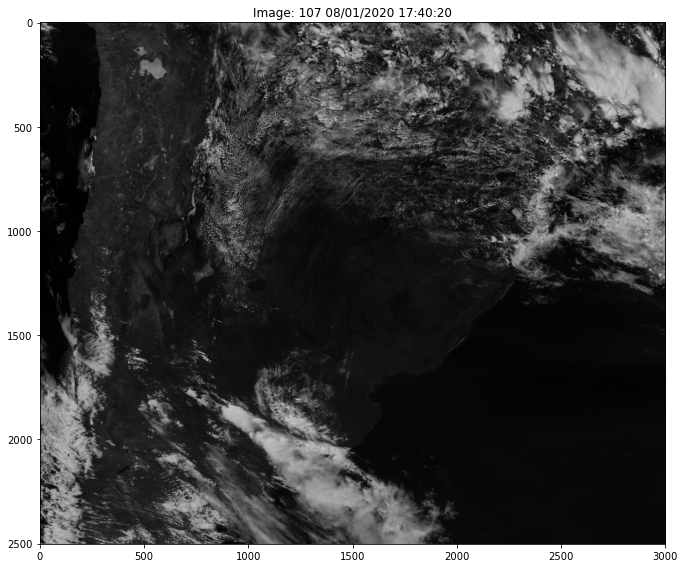

In [5]:
vertices = [1200, 2300, 700, 1800]

dataset = SatelliteImagesDataset(root_dir = 'data/images/dia_8')#,
                                # transform = CropImage(vertices))

visualization.plot_day_images(dataset, sleep_secs=0, start=70)




*Here i will explore the usage of collate_fn to load images as we want*

In [12]:
dataset_sw = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 3,
                                           transform = CropImage(3))

dataset = data.SatelliteImagesDataset(root_dir = 'data/images/dia_1',
                                           transform = CropImage(3))


In [8]:
print(dataset_sw[0]['time_stamps'])
print(dataset_sw[0]['images'].shape)


['01/01/2020 00:00:21', '01/01/2020 00:10:21', '01/01/2020 00:20:21']
(3, 1000, 1000)


['01/01/2020 00:00:21', '01/01/2020 00:10:21', '01/01/2020 00:20:21']


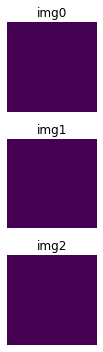

['01/01/2020 01:40:21', '01/01/2020 01:50:21', '01/01/2020 02:00:21']


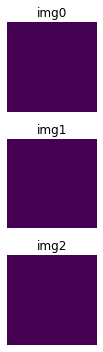

['01/01/2020 03:20:21', '01/01/2020 03:30:21', '01/01/2020 03:40:21']


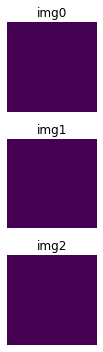

['01/01/2020 05:00:21', '01/01/2020 05:10:21', '01/01/2020 05:20:21']


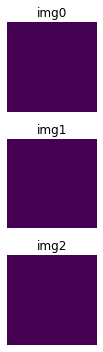

['01/01/2020 06:40:21', '01/01/2020 06:50:21', '01/01/2020 07:00:21']


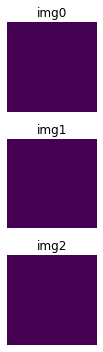

['01/01/2020 08:20:21', '01/01/2020 08:30:21', '01/01/2020 08:40:21']


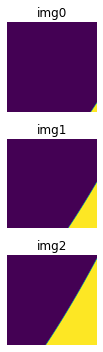

['01/01/2020 10:00:21', '01/01/2020 10:10:21', '01/01/2020 10:20:21']


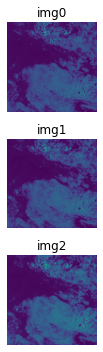

['01/01/2020 11:40:21', '01/01/2020 11:50:21', '01/01/2020 12:00:21']


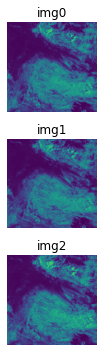

['01/01/2020 13:20:21', '01/01/2020 13:30:21', '01/01/2020 13:40:21']


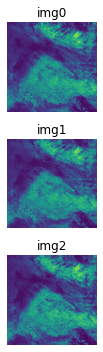

['01/01/2020 15:00:21', '01/01/2020 15:10:21', '01/01/2020 15:20:21']


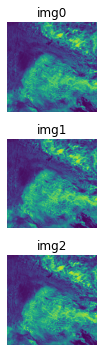

['01/01/2020 16:40:21', '01/01/2020 16:50:21', '01/01/2020 17:00:21']


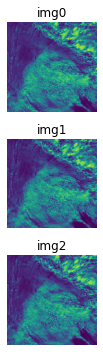

['01/01/2020 18:20:21', '01/01/2020 18:30:21', '01/01/2020 18:40:21']


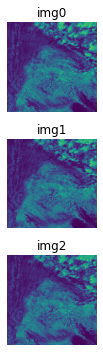

['01/01/2020 20:00:21', '01/01/2020 20:10:21', '01/01/2020 20:20:21']


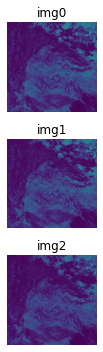

KeyboardInterrupt: 

In [11]:
dl_sw = DataLoader(dataset_sw, batch_size=1, collate_fn=data.collate_fn_sw)

for idx, samples in enumerate(dl_sw):
    if idx%10 == 0:
        print(samples['time_stamps'])
        visualization.show_image_list([samples['images'][i] for i in range(samples['images'].size(0))], 3)


In [3]:
# This cell explores how much more time takes to go through the dataset one image at a time vs with the custom moving window of 10
dataset_sw = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3))

dataset = data.SatelliteImagesDataset(root_dir = 'data/images/dia_1',
                                           transform = CropImage(3))

dl_sw = DataLoader(dataset_sw, batch_size=1, collate_fn=data.collate_fn_sw)
dl = DataLoader(dataset, batch_size=10)

import time
# pyTorch custom dataset with moving window of 10
start = time.time()
for samples in dl_sw:
    pass
end = time.time()
dl_sw_time = end - start

# pyTorch dataset with batch size of 10
start = time.time()
for sample in dl:
    pass
end = time.time()
dl_time = end - start

# Previous implementetion without pyTorch
images, time_stamps = [], []

start = time.time()
images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_1', images, time_stamps, 10, "")

for i in range(len(os.listdir('data/images/dia_1')) - 10):
    images, time_stamps, last_img_filename = data.load_by_batches('data/images/dia_1', images, time_stamps, 10, last_img_filename)
end = time.time()
wo_pytorch_time = end - start

# hex(id(x))


print("pytorch + SW: ", dl_sw_time, "pytorch: ", dl_time, "WO pyTorch: ", wo_pytorch_time)

pytorch + SW:  88.20445823669434 pytorch:  2.0418286323547363 WO pyTorch:  1.3168261051177979


In [50]:
# Here I will explore Python memory usage and how I can improve the dataset to load images faster
def find_malloc(var):
    print(f'Location: {hex(id(var))}')
    print(f'Size: {getsizeof(var)} bytes')
    return

# x = [1, 2, 3]
# find_malloc(x)
# del x[0]
# find_malloc(x)

# dataset_sw = data.SatelliteImagesDatasetSW_v2(root_dir = 'data/images/dia_1', 
#                                            window = 10,
#                                            transform = CropImage(3))

# # find_malloc(dataset_sw[0])
# # find_malloc(dataset_sw[1])

# print(dataset_sw.samples.keys())

# for testin new image appending to matrix:
# arr = np.array([np.ones((2, 2)), np.ones((2, 2))*2, np.ones((2, 2))*3, np.ones((2, 2))*4])

# print(arr), print(arr.shape)
# print(), print()

# arr2 = np.delete(arr, obj=0 ,axis=0)
# print(arr2), print(arr2.shape)
# print(), print() 

# arr3 = np.append(arr2, values=np.reshape(np.ones((2, 2))*5, [1, 2, 2]) ,axis=0)
# print(arr3), print(arr3.shape)

# lista = ['1', '2', '3']
# find_malloc(lista)
# del lista[0]
# find_malloc(lista)
# lista.append('4')
# find_malloc(lista)

### Comment:
Reading from https://numpy.org/doc/stable/reference/arrays.scalars.html
numpy arrays are immutable, so i cannot modify it as i would do with a list. So everytime I delete elements i have to assign it to a new space in memory and that is what np.delete does. Since i just move an array already in memory and im not loading all the images againg i hope that this speeds up the dataloader

In [3]:
# Testing of the new implementation of the custom Dataset class

dataset_sw = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3))

dataset_sw_v2 = data.SatelliteImagesDatasetSW_v2(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3))

dl_sw = DataLoader(dataset_sw, batch_size=1, collate_fn=data.collate_fn_sw)
dl_sw_v2 = DataLoader(dataset_sw_v2, batch_size=1, collate_fn=data.collate_fn_sw)

import time

start = time.time()
for samples in dl_sw:
    pass
end = time.time()
dl_sw_time = end - start

start = time.time()
for samples in dl_sw_v2:
    pass
end = time.time()
dl_sw_v2_time = end - start

print(f'V1: {dl_sw_time} secs. V2: {dl_sw_v2_time} secs.')



V1: 66.9167218208313 secs. V2: 6.483488321304321 secs.


In [107]:
# Use of cosz to determine which part of the image to use

# load_img func
meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'
img_name='ART_2020144_112016.FR'
mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
img_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'

lats, lons = pf.read_meta(meta_path)

dtime = pf.get_dtime(img_name)

cosangs, cos_mask = pf.get_cosangs(dtime, lats, lons)

img_mask = pf.load_mask(
    img_name, mk_folder_path, lats.size, lons.size
)

img = pf.load_img(
    img_name, img_folder_path, lats.size, lons.size
)
rimg = cv.inpaint(img, img_mask, 3, cv.INPAINT_NS)
rp_image = pf.normalize(rimg, cosangs, 0.15)
    

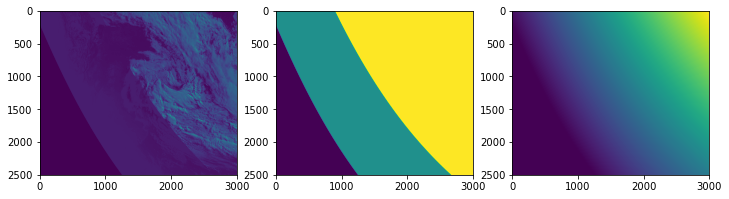

In [108]:
cosz = cosangs.copy()

# idx = np.where(rp_image[-1] == 0)[0][-1]
# cosangs[-1, idx+1]

# the black region on the image corresponds to cosangs==0
#cosz[cosangs <= 0] = 0
cosz[(0 < cosangs) & (cosangs <= 0.15)] = 0.5
cosz[0.15 < cosangs] = 1

fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rp_image)
ax[1].imshow(cosz)
ax[2].imshow(cosangs)
plt.show()



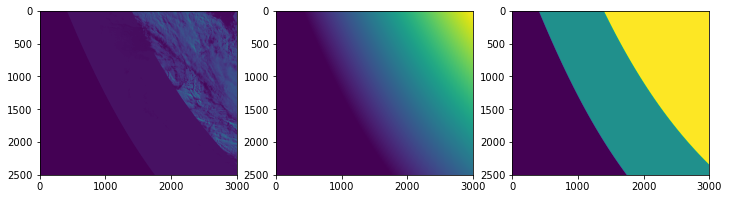

In [3]:
meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'
img_name='ART_2020144_110016.FR'
mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
img_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'

img = data.load_img(meta_path=meta_path,
                    img_name=img_name,
                    mk_folder_path=mk_folder_path,
                    img_folder_path=img_folder_path
)
cosangs, cosangs_thresh = utils.get_cosangs_mask(meta_path=meta_path,
                                                img_name=img_name
)

fig, ax = plt.subplots(ncols=3)
ax[0].imshow(img)
ax[1].imshow(cosangs)
ax[2].imshow(cosangs_thresh)
plt.show()



In [3]:
# Testing of cosangs mask loading in Dataset class

meta_path = '/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'
dataset_sw = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = None,#CropImage(3),
                                           load_cosangs=True,
                                           meta_path = meta_path)

dataset_sw[0].keys()

dict_keys(['images', 'time_stamps', 'cosangs_masks'])

['01/01/2020 09:10:21', '01/01/2020 09:20:21', '01/01/2020 09:30:21', '01/01/2020 09:40:21', '01/01/2020 09:50:21', '01/01/2020 10:00:21', '01/01/2020 10:10:21', '01/01/2020 10:20:21', '01/01/2020 10:30:21', '01/01/2020 10:40:21']


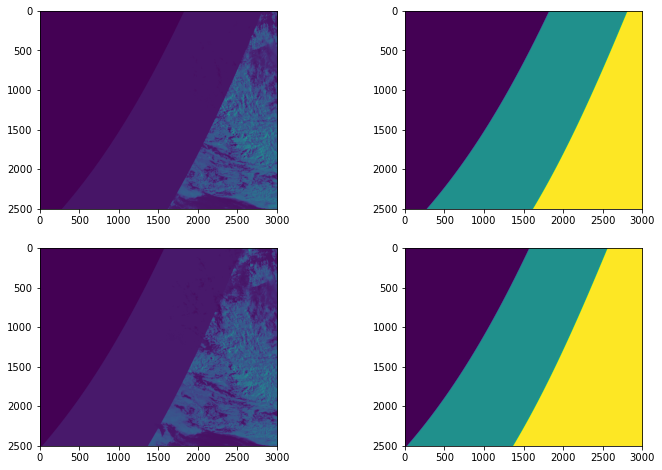

In [4]:

for idx, samples in enumerate(dataset_sw):
    if idx >= 55:
        print(samples['time_stamps'])
        # print(samples['images'][0].shape)
        # print(samples['cosangs_masks'][0].shape)
        fig, ax = plt.subplots(2, 2)
        ax[0, 0].imshow(samples['images'][0])
        ax[0, 1].imshow(samples['cosangs_masks'][0])

        ax[1, 0].imshow(samples['images'][1])
        ax[1, 1].imshow(samples['cosangs_masks'][1])
        plt.show()
        break


In [2]:
# Time comparison between loading the cosangs mask or not:

meta_path = '/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'

dataset_sw_masks = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3),
                                           load_cosangs=True,
                                           meta_path = meta_path)

dataset_sw = data.SatelliteImagesDatasetSW(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3))

dl_sw_masks = DataLoader(dataset_sw_masks, batch_size=1, collate_fn=data.collate_fn_sw)
dl_sw = DataLoader(dataset_sw, batch_size=1, collate_fn=data.collate_fn_sw)

import time

start = time.time()
for samples in dl_sw:
    pass
end = time.time()
dl_sw_time = end - start

start = time.time()
for samples in dl_sw_masks:
    pass
end = time.time()
dl_sw_masks_time = end - start

print(f'WO the cosangs masks: {dl_sw_time} secs. Loading the cosangs masks: {dl_sw_masks_time} secs.')



WO the cosangs masks: 44.5299551486969 secs. Loading the cosangs masks: 72.56941843032837 secs.


In [2]:
# Previous version without the cosangs option
dataset_sw_v2 = data.SatelliteImagesDatasetSW_v2(root_dir = 'data/images/dia_1', 
                                           window = 10,
                                           transform = CropImage(3))

dl_sw_v2 = DataLoader(dataset_sw_v2, batch_size=1, collate_fn=data.collate_fn_sw)

import time

start = time.time()
for samples in dl_sw_v2:
    pass
end = time.time()
dl_sw_v2_time = end - start

print(f'V2: {dl_sw_v2_time} secs.')

V2: 5.683847904205322 secs.


In [ ]:
# Now i will check if it works ok:

fig, ax = plt.subplots(2, 2)
        ax[0, 0].imshow(samples['images'][0])
        ax[0, 1].imshow(samples['cosangs_masks'][0])

        ax[1, 0].imshow(samples['images'][1])
        ax[1, 1].imshow(samples['cosangs_masks'][1])